## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)

In [3]:
a = -2
b = 1
y = a*X + b

#### Plot your data points. 

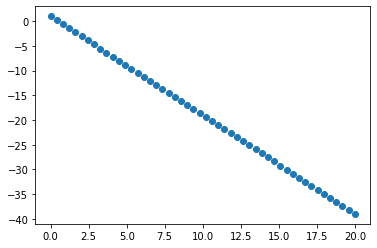

In [4]:
plt.scatter(X,y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def GradientDes(X, y, alpha, max_number_iter):
    Loss = []
    Theta_0 = []
    Theta_1 = []
    H_theta = []
    
    theta0 = 0
    theta1 = 0
    learning_rate = alpha
    for i in range(max_number_iter): 
        
        h_theta = theta0 + theta1*X
        
        m = len(X)
        
        
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        theta0 = theta0 - learning_rate*drev_theta0
        theta1 = theta1 - learning_rate*drev_theta1
        
        theta_vector = [drev_theta0, drev_theta1]
        
        gradient = np.linalg.norm(theta_vector)
        
        h_theta = theta0 + theta1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        if i> 0 and abs(MSE-Loss[-1]) < 0.001:
            break
        elif i > 0 and gradient < 0.3:
            break
        else:
            Loss.append(MSE)
            H_theta.append(h_theta)
            Theta_0.append(theta0)
            Theta_1.append(theta1)
        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

In [6]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes(X, y, 0.001, 500)
print(Loss[-1])

0.16770268313644945


In [7]:
from sklearn.metrics import r2_score
r2_score(y, H_theta[-1])

0.9975831083900923

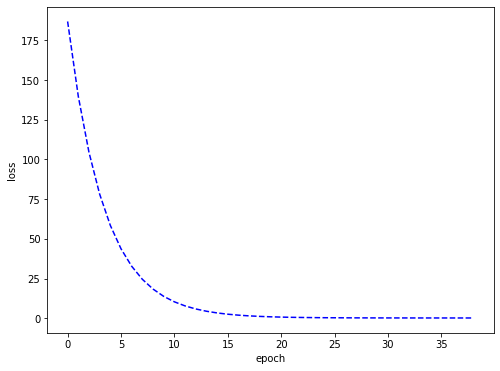

In [8]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

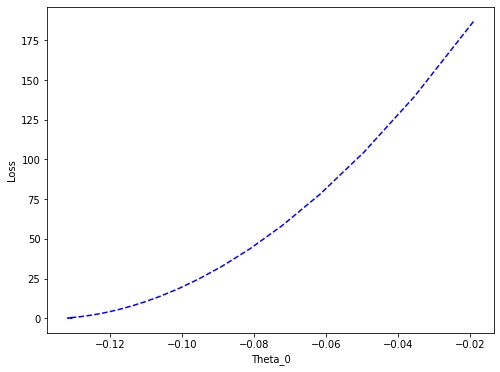

In [9]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

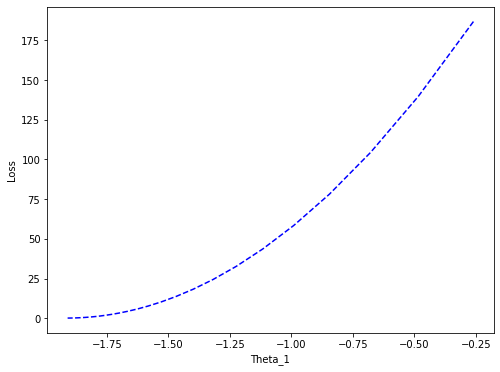

In [10]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

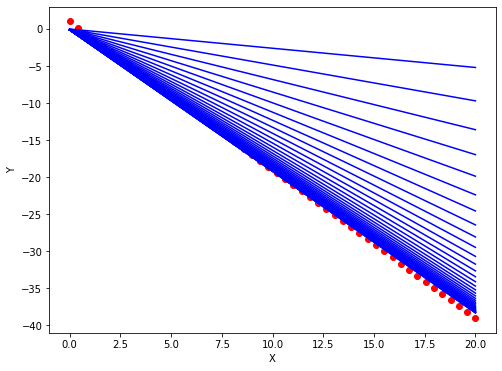

In [11]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

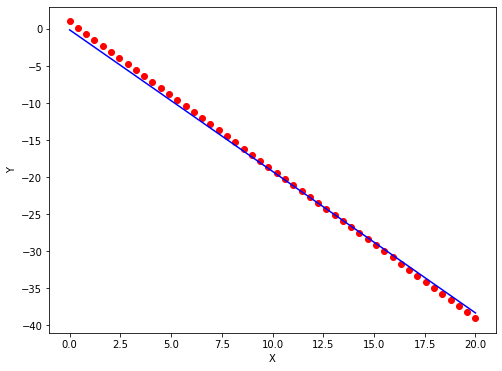

In [12]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

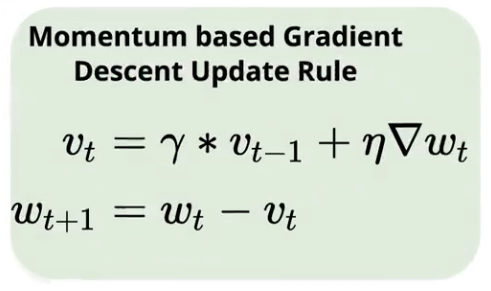

#### γ takes values between 0 and 1.
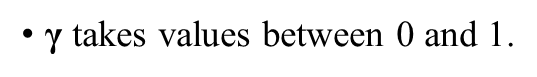

In [13]:
def GradientDes_mom(X, y, alpha, max_number_iter, gamma):
    Loss = []
    Theta_0 = []
    Theta_1 = []
    H_theta = []

    v_theta0 = 0
    v_theta1 = 0
    theta0 = 0
    theta1 = 0
    learning_rate = alpha
    for i in range(max_number_iter): 
        
        h_theta = theta0 + theta1*X
        
        m = len(X)
        
        
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        v_theta0 = gamma*v_theta0 + learning_rate*drev_theta0
        v_theta1 = gamma*v_theta1 + learning_rate*drev_theta1

        theta0 = theta0 - v_theta0
        theta1 = theta1 - v_theta1
        
        theta_vector = [drev_theta0, drev_theta1]
        
        gradient = np.linalg.norm(theta_vector)
        
        h_theta = theta0 + theta1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        if i> 0 and abs(MSE-Loss[-1]) < 0.001:
            break
        elif i > 0 and gradient < 0.3:
            break
        else:
            Loss.append(MSE)
            H_theta.append(h_theta)
            Theta_0.append(theta0)
            Theta_1.append(theta1)
        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

In [14]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_mom(X, y, 0.001, 400, 0.9)

In [15]:
Loss[-1]

0.11274161311835039

In [16]:
from sklearn.metrics import r2_score
r2_score(y, H_theta[-1])

0.9983751943991768

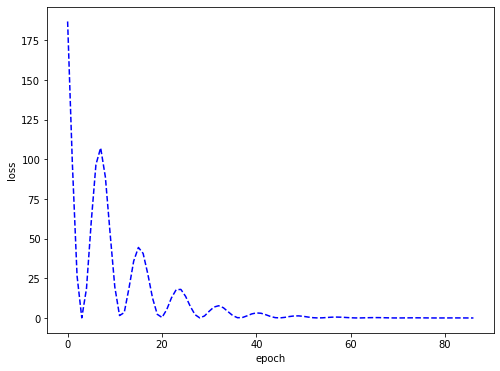

In [17]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

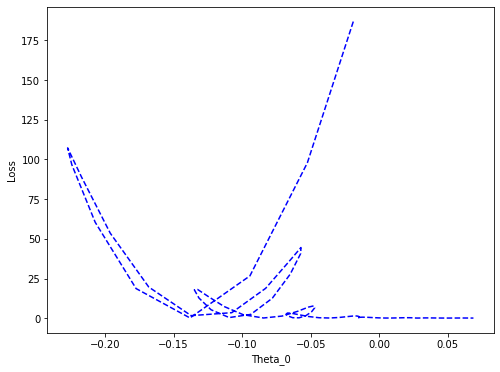

In [18]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

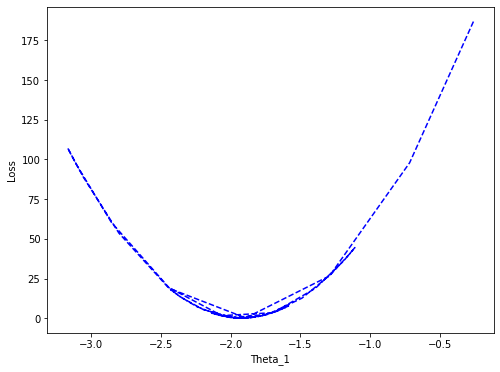

In [19]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

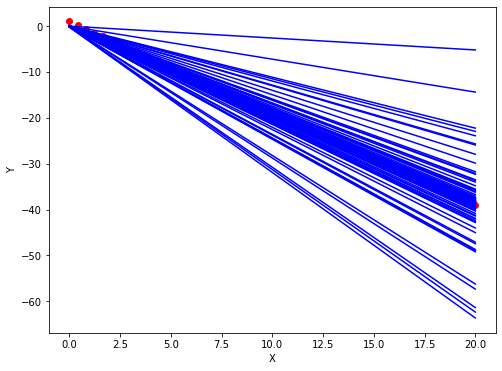

In [20]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

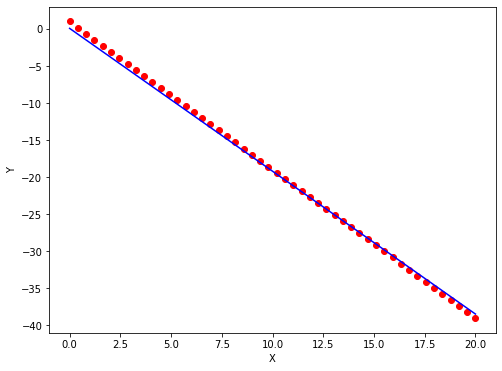

In [21]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [22]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_mom(X, y, 0.001, 400, 0)
Loss[-1]

0.16770268313644945

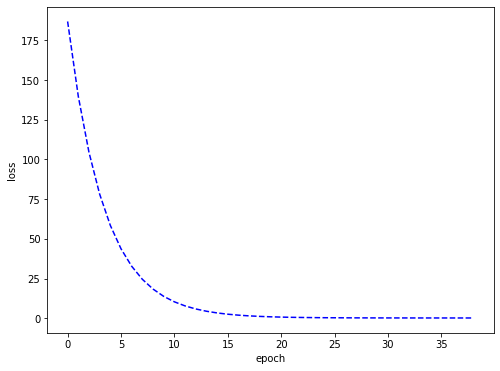

In [23]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

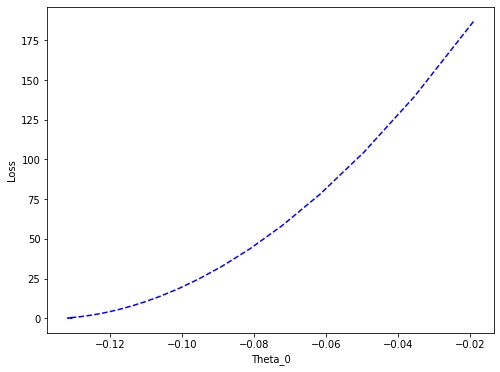

In [24]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

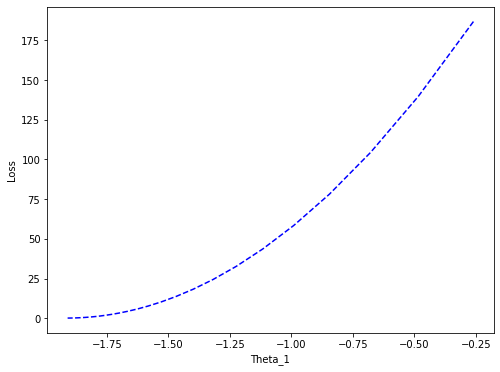

In [25]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

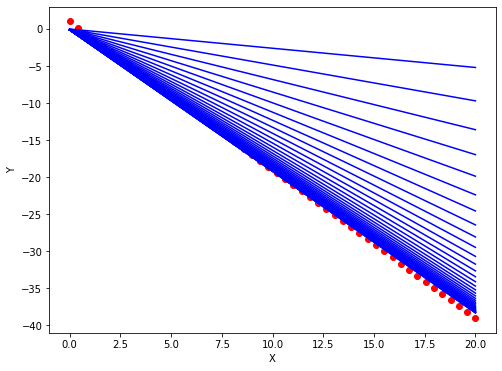

In [26]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

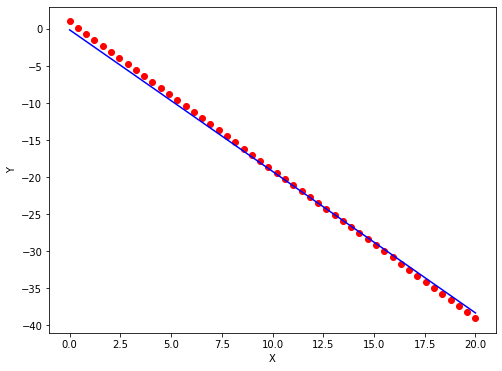

In [27]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [28]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_mom(X, y, 0.001, 400, 1)
Loss[-1]

180.69964122290352

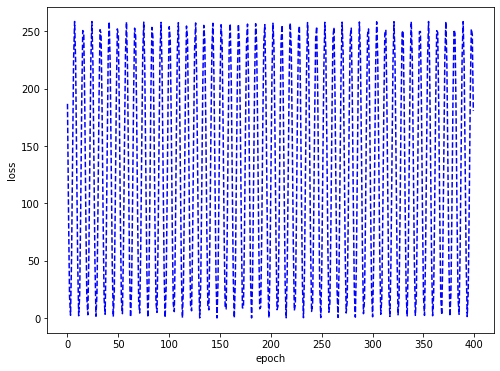

In [29]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

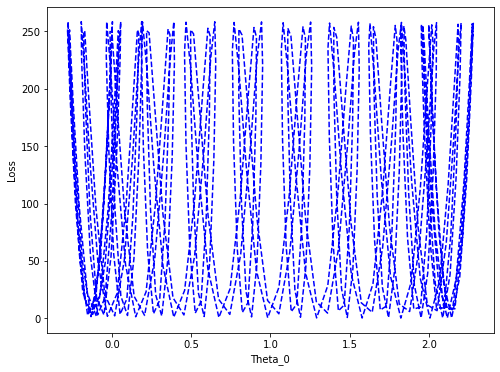

In [30]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

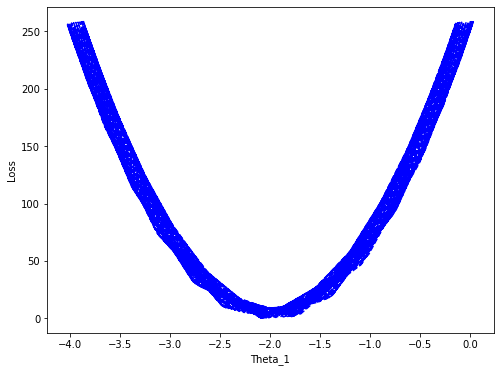

In [31]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

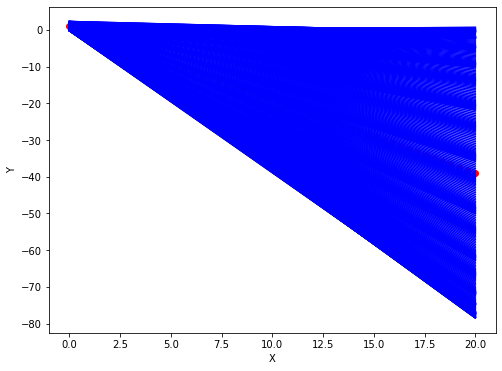

In [32]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

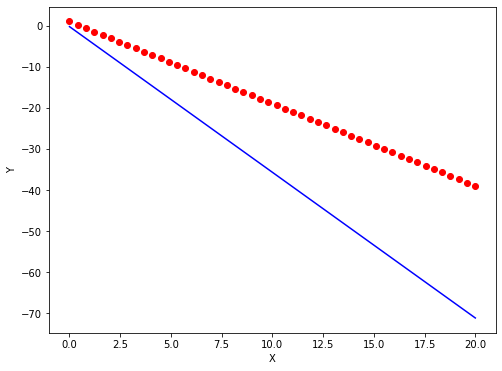

In [33]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

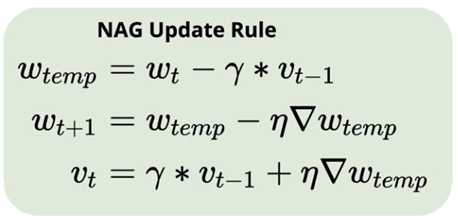

In [34]:
def GradientDes_NAG(X, y, alpha, max_number_iter, gamma):
    Loss = []
    Theta_0 = []
    Theta_1 = []
    H_theta = []

    v_theta0 = 0
    v_theta1 = 0
    theta0 = 0
    theta1 = 0
    
    w_temp0 = 0
    w_temp1 = 0
    learning_rate = alpha
    for i in range(max_number_iter): 
        
        h_theta = theta0 + theta1*X
        
        m = len(X)
        
        w_temp0 = theta0 - gamma*v_theta0
        w_temp1 = theta1 - gamma*v_theta1

        h_theta = w_temp0 + w_temp1*X

        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        theta0 = w_temp0 - learning_rate*drev_theta0
        theta1 = w_temp1 - learning_rate*drev_theta1

        v_theta0 = gamma*v_theta0 + learning_rate*drev_theta0
        v_theta1 = gamma*v_theta1 + learning_rate*drev_theta1
    
        
        theta_vector = [drev_theta0, drev_theta1]
        
        gradient = np.linalg.norm(theta_vector)
        
        h_theta = theta0 + theta1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        if i> 0 and abs(MSE-Loss[-1]) < 0.001:
            break
        elif i > 0 and gradient < 0.3:
            break
        else:
            Loss.append(MSE)
            H_theta.append(h_theta)
            Theta_0.append(theta0)
            Theta_1.append(theta1)
        
    return Theta_0, Theta_1, Loss, H_theta, theta0, theta1

In [35]:
Theta_0, Theta_1, Loss, H_theta, theta0, theta1 = GradientDes_NAG(X, y, 0.001, 400, 0.9)

In [36]:
Loss[-1]

0.1446223895729057

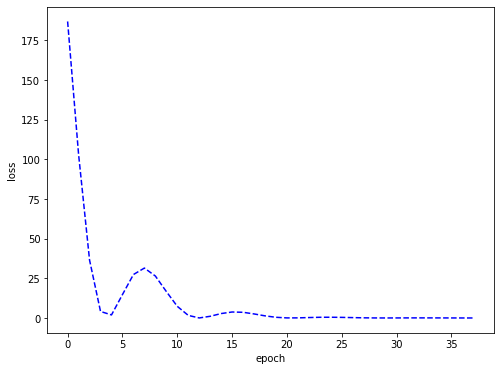

In [37]:
plt.figure(figsize = (8,6))
plt.plot(Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

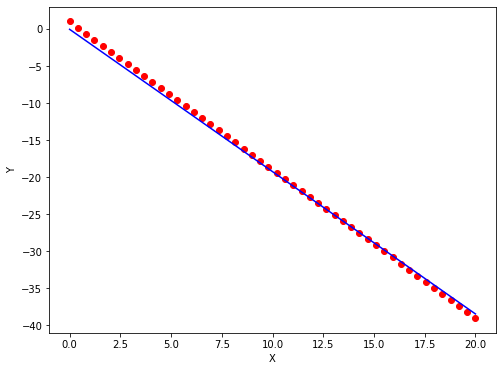

In [38]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

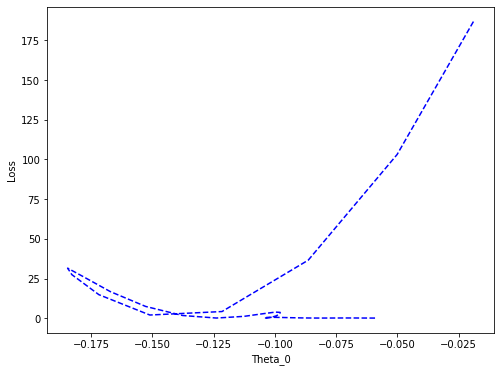

In [39]:
plt.figure(figsize = (8,6))
plt.plot(Theta_0, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.show()

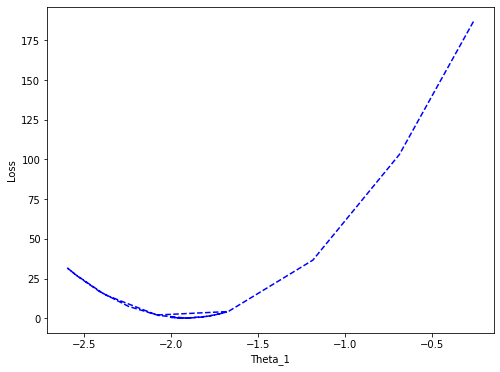

In [40]:
plt.figure(figsize = (8,6))
plt.plot(Theta_1, Loss, color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.show()

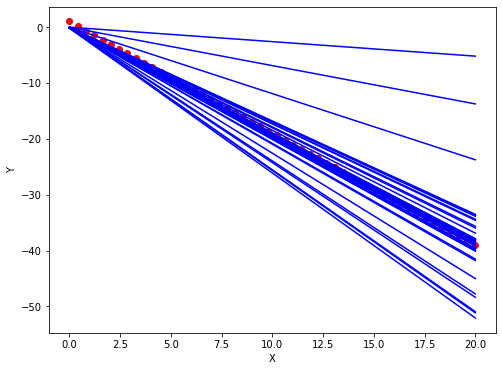

In [41]:
# Plotting all the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
for h_theta in H_theta:
    plt.plot(X, h_theta, color='blue',markerfacecolor='red',
         markersize=10)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

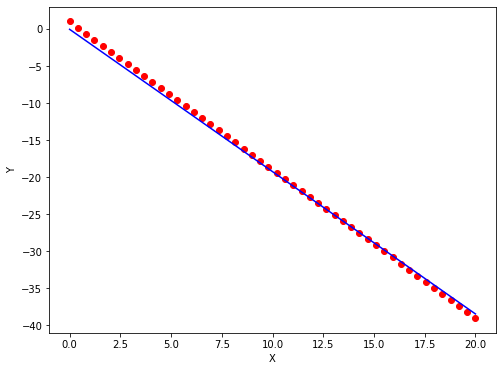

In [42]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker='o', color='red')
    
plt.plot(X, H_theta[-1], color='blue',markerfacecolor='red',
         markersize=15)
    
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Congratulations 
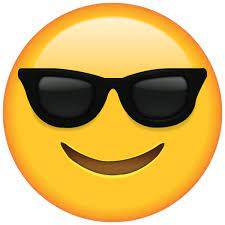